# Importing Libraries


     ---------------------------------------- 0.0/162.8 kB ? eta -:--:--
     -- ------------------------------------- 10.2/162.8 kB ? eta -:--:--
     --------- --------------------------- 41.0/162.8 kB 653.6 kB/s eta 0:00:01
     ------------------ ------------------ 81.9/162.8 kB 762.6 kB/s eta 0:00:01
     ------------------------ ----------- 112.6/162.8 kB 726.2 kB/s eta 0:00:01
     ------------------------------- ---- 143.4/162.8 kB 711.9 kB/s eta 0:00:01
     ------------------------------------ 162.8/162.8 kB 696.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/7.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.7 MB 1.4 MB/s eta 0:00:06
   ---------------------------------------- 0.1/7.7 MB 825.8 kB/s eta 0:00:10
   ---------------------------------------- 0.1/7.7 MB 751.6 kB/s eta 0:00:11
    --------------------------------------- 0.1/7.7 MB 722.1 kB/s eta 0:00:11
    --------------------------------------- 0.2/7.7 MB 706.2 kB/s eta 0:0

In [27]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random

In [10]:
from sklearn.cluster import DBSCAN

## Generating sets of Random Points 

In [11]:
def generate_points(m, n):
    set_a = [(random.uniform(-100, 100), random.uniform(-100, 100)) for _ in range(m)]
    set_b = [(random.uniform(-100, 100), random.uniform(-100, 100)) for _ in range(n)]
    return set_a, set_b


## Simple comparision

In [12]:
def find_close_pairs(set_a, set_b, epsilon):
    close_pairs = []
    for a_point in set_a:
        for b_point in set_b:
            distance = math.sqrt((a_point[0] - b_point[0])**2 + (a_point[1] - b_point[1])**2)
            if distance < epsilon:
                close_pairs.append((a_point, b_point))
    return close_pairs


### Implementing DBScan which is an optimal way of finding points within a specific distance, 
### It improves the time complexity of the previous brute force by avoiding unnecessary points that lie outside of the cluster

In [31]:
def find_close_pairs_with_dbscan(set_a, set_b, epsilon, min_samples):
    db_a = DBSCAN(eps=epsilon, min_samples=min_samples).fit(set_a)
    labels_a = db_a.labels_
    
    db_b = DBSCAN(eps=epsilon, min_samples=min_samples).fit(set_b)
    labels_b = db_b.labels_
    
    close_pairs = []
    
    for cluster_id in np.unique(labels_a):
        if cluster_id != -1: # Ignore noise points
            cluster_a = [set_a[i] for i in range(len(set_a)) if labels_a[i] == cluster_id]
            close_pairs.extend(find_close_pairs(cluster_a, cluster_a, epsilon))
    
   
    for cluster_id_a in np.unique(labels_a):
        if cluster_id_a != -1:
            cluster_a = [set_a[i] for i in range(len(set_a)) if labels_a[i] == cluster_id_a]
            for cluster_id_b in np.unique(labels_b):
                if cluster_id_b != -1:
                    cluster_b = [set_b[i] for i in range(len(set_b)) if labels_b[i] == cluster_id_b]
                    close_pairs.extend(find_close_pairs(cluster_a, cluster_b, epsilon))
    
    noise_a = [set_a[i] for i in range(len(set_a)) if labels_a[i] == -1]
    noise_b = [set_b[i] for i in range(len(set_b)) if labels_b[i] == -1]
    close_pairs.extend(find_close_pairs(noise_a, set_b, epsilon))
    close_pairs.extend(find_close_pairs(set_a, noise_b, epsilon))
    
    return close_pairs, labels_a, labels_b


# We plot graph for each cluster formed

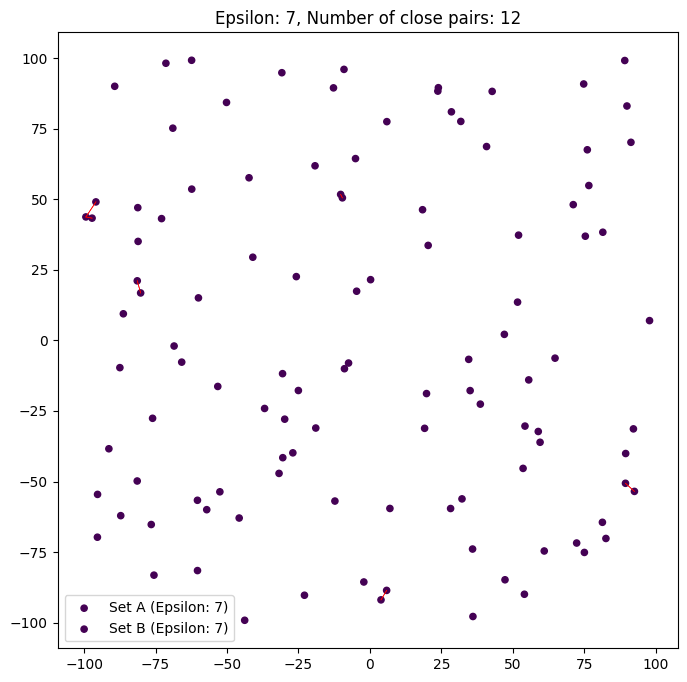

Epsilon: 7, Number of close pairs: 12
Pair: (3.888049913177923, -91.918249377905) - (5.859609143452047, -88.5595692154834)
Pair: (-10.232286034400829, 51.66906704348773) - (-9.6231500754389, 50.456785050554856)
Pair: (89.42743992822287, -50.631987366174094) - (92.55704592559854, -53.50126515175546)
Pair: (-97.20528897627372, 43.27020180345866) - (-99.36236731385242, 43.69499826566758)
Pair: (-80.20859264125015, 16.77666650495678) - (-81.39245023488274, 21.0699076515171)
Pair: (-95.85750341140675, 49.01988600820198) - (-99.36236731385242, 43.69499826566758)
Pair: (3.888049913177923, -91.918249377905) - (5.859609143452047, -88.5595692154834)
Pair: (-10.232286034400829, 51.66906704348773) - (-9.6231500754389, 50.456785050554856)
Pair: (89.42743992822287, -50.631987366174094) - (92.55704592559854, -53.50126515175546)
Pair: (-97.20528897627372, 43.27020180345866) - (-99.36236731385242, 43.69499826566758)
Pair: (-80.20859264125015, 16.77666650495678) - (-81.39245023488274, 21.0699076515171)


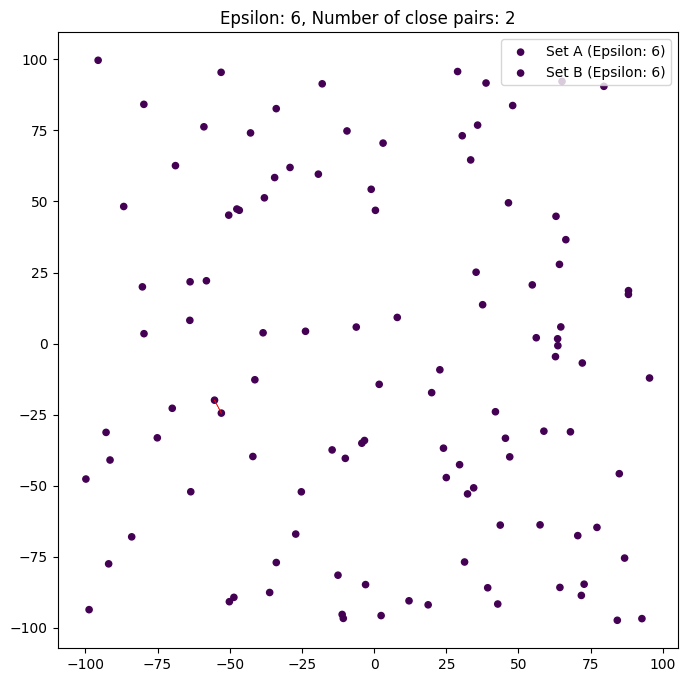

Epsilon: 6, Number of close pairs: 2
Pair: (-52.893666886726166, -24.45179448594881) - (-55.25345713946557, -19.902601935067537)
Pair: (-52.893666886726166, -24.45179448594881) - (-55.25345713946557, -19.902601935067537)


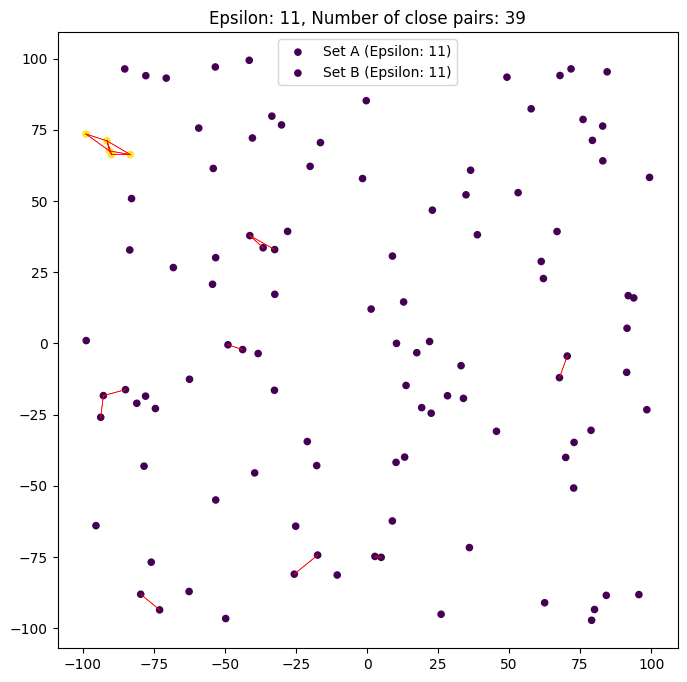

Epsilon: 11, Number of close pairs: 39
Pair: (-98.9405971211899, 73.51256617422484) - (-98.9405971211899, 73.51256617422484)
Pair: (-98.9405971211899, 73.51256617422484) - (-91.5062285819574, 71.10172363703444)
Pair: (-98.9405971211899, 73.51256617422484) - (-90.63638190727681, 67.57694064841314)
Pair: (-91.5062285819574, 71.10172363703444) - (-98.9405971211899, 73.51256617422484)
Pair: (-91.5062285819574, 71.10172363703444) - (-91.5062285819574, 71.10172363703444)
Pair: (-91.5062285819574, 71.10172363703444) - (-90.63638190727681, 67.57694064841314)
Pair: (-91.5062285819574, 71.10172363703444) - (-89.9104731752594, 66.29896309519799)
Pair: (-91.5062285819574, 71.10172363703444) - (-83.31090919101152, 66.28450936699599)
Pair: (-90.63638190727681, 67.57694064841314) - (-98.9405971211899, 73.51256617422484)
Pair: (-90.63638190727681, 67.57694064841314) - (-91.5062285819574, 71.10172363703444)
Pair: (-90.63638190727681, 67.57694064841314) - (-90.63638190727681, 67.57694064841314)
Pair: (-

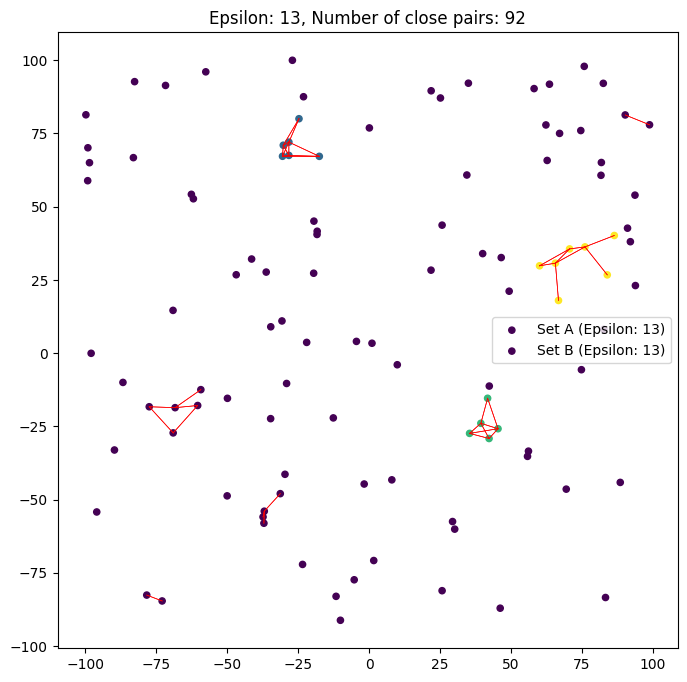

Epsilon: 13, Number of close pairs: 92
Pair: (-17.553860575935857, 67.18743704256525) - (-17.553860575935857, 67.18743704256525)
Pair: (-17.553860575935857, 67.18743704256525) - (-28.273516199497678, 67.51154167546406)
Pair: (-17.553860575935857, 67.18743704256525) - (-28.27034795498689, 72.0459590630995)
Pair: (-17.553860575935857, 67.18743704256525) - (-30.50721222166291, 67.21046940528922)
Pair: (-28.273516199497678, 67.51154167546406) - (-17.553860575935857, 67.18743704256525)
Pair: (-28.273516199497678, 67.51154167546406) - (-28.273516199497678, 67.51154167546406)
Pair: (-28.273516199497678, 67.51154167546406) - (-28.27034795498689, 72.0459590630995)
Pair: (-28.273516199497678, 67.51154167546406) - (-30.24464291117333, 70.98104385343902)
Pair: (-28.273516199497678, 67.51154167546406) - (-30.50721222166291, 67.21046940528922)
Pair: (-24.709650954671616, 80.02970259129049) - (-24.709650954671616, 80.02970259129049)
Pair: (-24.709650954671616, 80.02970259129049) - (-28.27034795498689

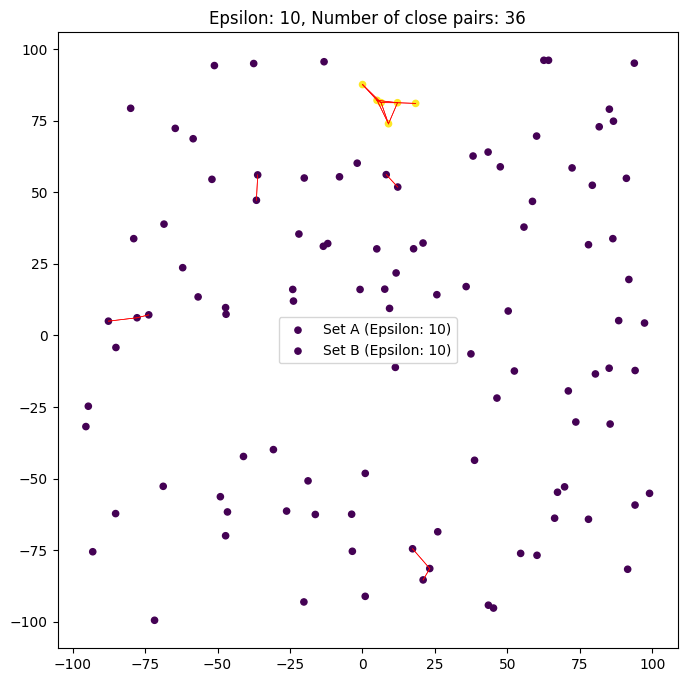

Epsilon: 10, Number of close pairs: 36
Pair: (5.061873930869879, 82.15247095356702) - (5.061873930869879, 82.15247095356702)
Pair: (5.061873930869879, 82.15247095356702) - (6.461016118944826, 81.33704434154922)
Pair: (5.061873930869879, 82.15247095356702) - (0.057259744912840915, 87.66258820606882)
Pair: (5.061873930869879, 82.15247095356702) - (12.12436887330162, 81.30720135541478)
Pair: (5.061873930869879, 82.15247095356702) - (9.013645429182148, 73.96161897962011)
Pair: (6.461016118944826, 81.33704434154922) - (5.061873930869879, 82.15247095356702)
Pair: (6.461016118944826, 81.33704434154922) - (6.461016118944826, 81.33704434154922)
Pair: (6.461016118944826, 81.33704434154922) - (0.057259744912840915, 87.66258820606882)
Pair: (6.461016118944826, 81.33704434154922) - (12.12436887330162, 81.30720135541478)
Pair: (6.461016118944826, 81.33704434154922) - (9.013645429182148, 73.96161897962011)
Pair: (0.057259744912840915, 87.66258820606882) - (5.061873930869879, 82.15247095356702)
Pair: 

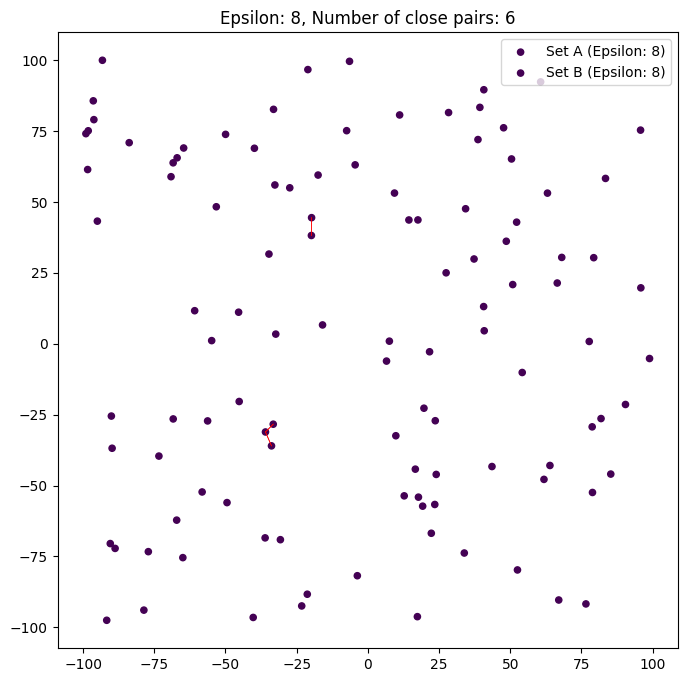

Epsilon: 8, Number of close pairs: 6
Pair: (-33.2170885840647, -28.36913887198149) - (-35.944650681607726, -31.116564970350936)
Pair: (-33.83062190809689, -36.01737990257197) - (-35.944650681607726, -31.116564970350936)
Pair: (-19.75128636612152, 44.4814477791042) - (-19.817785308138227, 38.189130058554554)
Pair: (-33.2170885840647, -28.36913887198149) - (-35.944650681607726, -31.116564970350936)
Pair: (-33.83062190809689, -36.01737990257197) - (-35.944650681607726, -31.116564970350936)
Pair: (-19.75128636612152, 44.4814477791042) - (-19.817785308138227, 38.189130058554554)


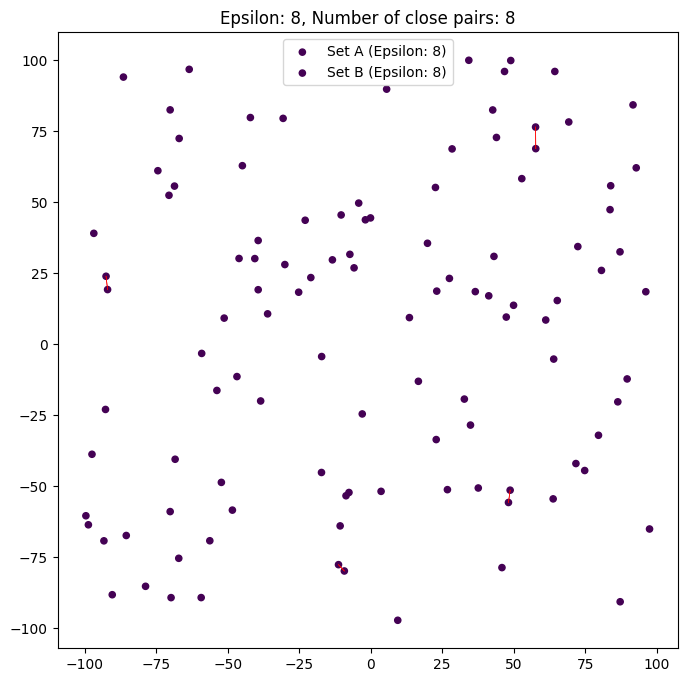

Epsilon: 8, Number of close pairs: 8
Pair: (-92.49234474255945, 23.885642804222826) - (-91.95657566274346, 19.194317189573226)
Pair: (57.63342852900445, 76.43817310981171) - (57.69226877814887, 68.82874188009299)
Pair: (48.74050846503883, -51.451574091610894) - (48.155094881685045, -55.788699956500864)
Pair: (-9.208460918704247, -79.91541934097881) - (-11.24898288156821, -77.68816540205181)
Pair: (-92.49234474255945, 23.885642804222826) - (-91.95657566274346, 19.194317189573226)
Pair: (57.63342852900445, 76.43817310981171) - (57.69226877814887, 68.82874188009299)
Pair: (48.74050846503883, -51.451574091610894) - (48.155094881685045, -55.788699956500864)
Pair: (-9.208460918704247, -79.91541934097881) - (-11.24898288156821, -77.68816540205181)


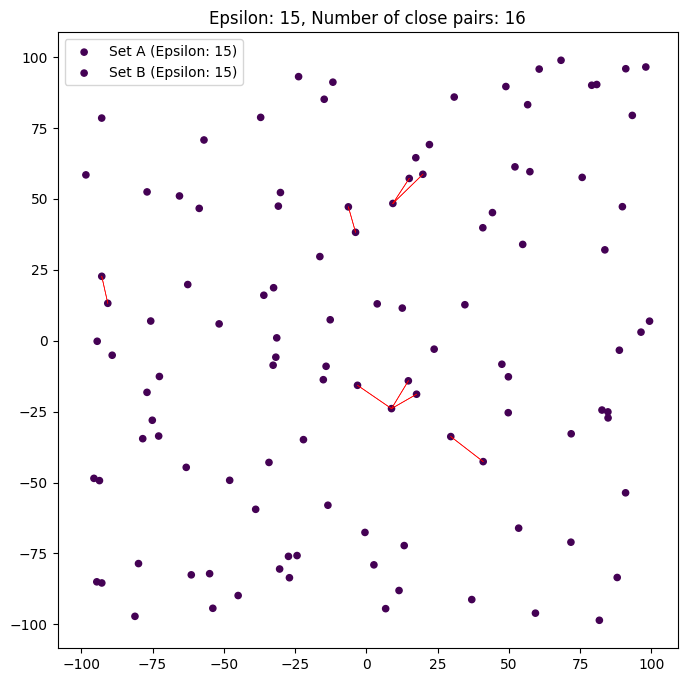

Epsilon: 15, Number of close pairs: 16
Pair: (40.979194891011474, -42.62279606870572) - (29.60812035846203, -33.79463079859626)
Pair: (-90.67991230752297, 13.18612400874592) - (-92.79819542899148, 22.70165723349578)
Pair: (15.04370024090575, 57.204742628886805) - (9.303560932564906, 48.3843958456566)
Pair: (-3.781417373166377, 38.21497979042579) - (-6.3075182679367, 47.18322099825764)
Pair: (-3.1020262297274144, -15.718986430324719) - (8.822599093847174, -23.938390287910607)
Pair: (17.61128200460955, -18.86226838367068) - (8.822599093847174, -23.938390287910607)
Pair: (14.731118130741933, -14.13924265821025) - (8.822599093847174, -23.938390287910607)
Pair: (19.825590361042742, 58.67010562916414) - (9.303560932564906, 48.3843958456566)
Pair: (40.979194891011474, -42.62279606870572) - (29.60812035846203, -33.79463079859626)
Pair: (-90.67991230752297, 13.18612400874592) - (-92.79819542899148, 22.70165723349578)
Pair: (15.04370024090575, 57.204742628886805) - (9.303560932564906, 48.3843958

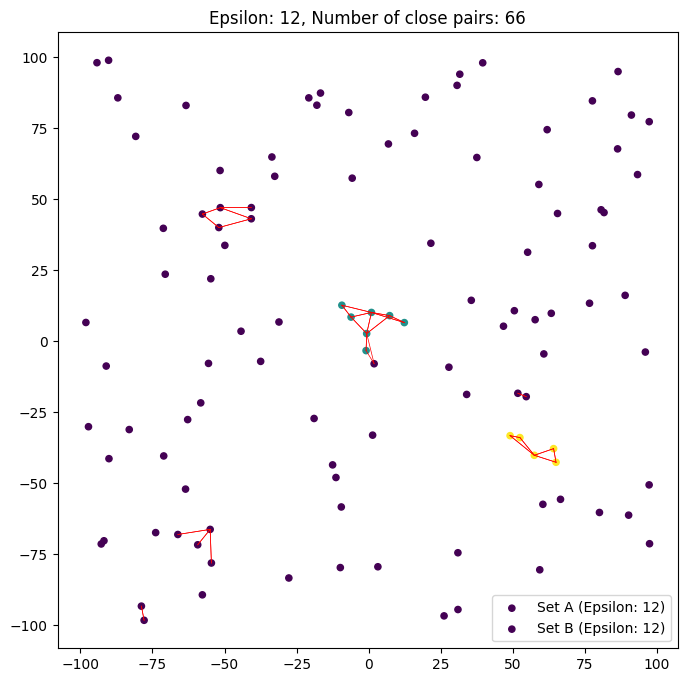

Epsilon: 12, Number of close pairs: 66
Pair: (12.36998626405861, 6.561761493179603) - (12.36998626405861, 6.561761493179603)
Pair: (12.36998626405861, 6.561761493179603) - (0.9611841107287233, 10.13793947247683)
Pair: (12.36998626405861, 6.561761493179603) - (7.268624599858526, 9.016334263943463)
Pair: (-0.901736953730861, -3.296209196448686) - (-0.901736953730861, -3.296209196448686)
Pair: (-0.901736953730861, -3.296209196448686) - (-0.6928748027199276, 2.7095649064182084)
Pair: (-0.6928748027199276, 2.7095649064182084) - (-0.901736953730861, -3.296209196448686)
Pair: (-0.6928748027199276, 2.7095649064182084) - (-0.6928748027199276, 2.7095649064182084)
Pair: (-0.6928748027199276, 2.7095649064182084) - (0.9611841107287233, 10.13793947247683)
Pair: (-0.6928748027199276, 2.7095649064182084) - (7.268624599858526, 9.016334263943463)
Pair: (-0.6928748027199276, 2.7095649064182084) - (-6.105595286415607, 8.498443497676618)
Pair: (0.9611841107287233, 10.13793947247683) - (12.36998626405861, 6

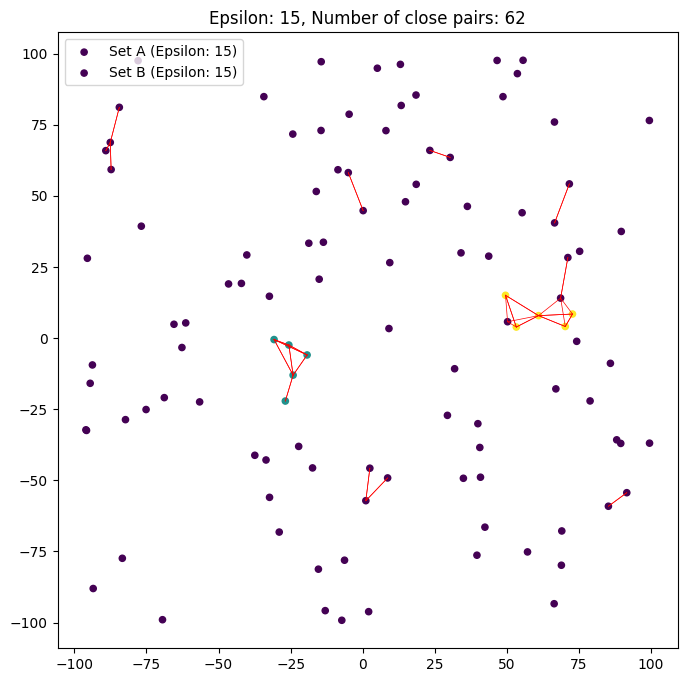

Epsilon: 15, Number of close pairs: 62
Pair: (-24.131723203841247, -13.027137172421519) - (-24.131723203841247, -13.027137172421519)
Pair: (-24.131723203841247, -13.027137172421519) - (-25.607119240849457, -2.436896099127253)
Pair: (-24.131723203841247, -13.027137172421519) - (-30.742114323902214, -0.5209092667794977)
Pair: (-24.131723203841247, -13.027137172421519) - (-19.27870480044176, -5.934324334269476)
Pair: (-24.131723203841247, -13.027137172421519) - (-26.83125967108772, -22.13358648792007)
Pair: (-25.607119240849457, -2.436896099127253) - (-24.131723203841247, -13.027137172421519)
Pair: (-25.607119240849457, -2.436896099127253) - (-25.607119240849457, -2.436896099127253)
Pair: (-25.607119240849457, -2.436896099127253) - (-30.742114323902214, -0.5209092667794977)
Pair: (-25.607119240849457, -2.436896099127253) - (-19.27870480044176, -5.934324334269476)
Pair: (-30.742114323902214, -0.5209092667794977) - (-24.131723203841247, -13.027137172421519)
Pair: (-30.742114323902214, -0.52

In [34]:
 # Sample input for performance
m = 100
n = 10
min_samples = 5
for _ in range(10):
    epsilon = random.randint(5, 15)
    set_a, set_b = generate_points(m, n)
    close_pairs,labels_a, labels_b = find_close_pairs_with_dbscan(set_a, set_b, epsilon, min_samples)
    fig, ax = plt.subplots(figsize=(8, 8))
    
  
    ax.scatter([p[0] for p in set_a], [p[1] for p in set_a], c=[labels_a[i] for i in range(len(set_a))], s=20, label=f"Set A (Epsilon: {epsilon})")
    
   
    ax.scatter([p[0] for p in set_b], [p[1] for p in set_b], c=[labels_b[i] for i in range(len(set_b))], s=20, label=f"Set B (Epsilon: {epsilon})")
    
    
    for pair in close_pairs:
        ax.plot([pair[0][0], pair[1][0]], [pair[0][1], pair[1][1]], color='r', linewidth=0.5)
    
    ax.set_title(f"Epsilon: {epsilon}, Number of close pairs: {len(close_pairs)}")
    ax.legend()
    plt.show()
    print(f"Epsilon: {epsilon}, Number of close pairs: {len(close_pairs)}")
    for pair in close_pairs:
        print(f"Pair: {pair[0]} - {pair[1]}")